In [1]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import torch

%matplotlib inline

In [3]:
use_cuda = torch.cuda.is_available()
device = 'cuda' if use_cuda else 'cpu'

#Do not forget to run pip install facenet-pytorch
from facenet_pytorch import MTCNN
mtcnn = MTCNN(keep_all=False, post_process=False, min_face_size=40, device=device)

def detect_face(frame):
    bounding_boxes, probs = mtcnn.detect(frame, landmarks=False)
    bounding_boxes=bounding_boxes[probs>0.9]
    return bounding_boxes

print(use_cuda)

False


In [4]:
from hsemotion.facial_emotions import HSEmotionRecognizer
model_name='enet_b0_8_best_afew'
#model_name='enet_b0_8_best_vgaf'
#model_name='enet_b0_8_va_mtl'
#model_name='enet_b2_8'

fer=HSEmotionRecognizer(model_name=model_name,device=device)

D:\Users\z.zhang8\.hsemotion\enet_b0_8_best_afew.pt Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


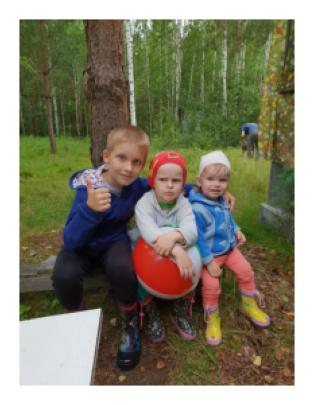

In [5]:
fpath='faces.png'
frame_bgr = cv2.imread(fpath)
plt.figure(figsize=(5, 5))
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(frame)

bounding_boxes=detect_face(frame)

Happiness [-1.9885316   2.9324007  -1.0242788  -2.688281    3.085247   -0.43439263
 -2.2097394  -0.9652283 ]
Anger [ 4.6912956   1.300211    0.767809   -0.6189011  -0.39247006  2.6396759
  0.83138543 -1.2962061 ]
Happiness [-0.8241225  -1.0533046   0.07148698  0.37763482  1.6497859   1.5549223
  1.2834698  -1.0846391 ]


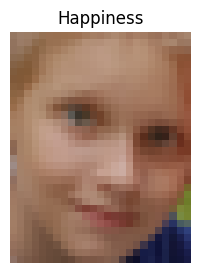

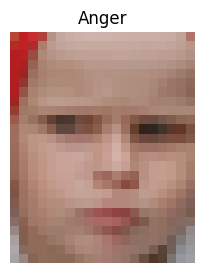

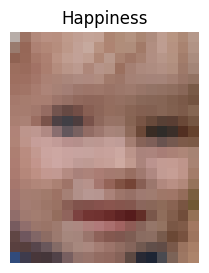

In [6]:
for bbox in bounding_boxes:
    box = bbox.astype(int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    emotion,scores=fer.predict_emotions(face_img,logits=True)
    print(emotion,scores)
    
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(emotion)

In [7]:
features=fer.extract_features(face_img)
print(features.shape,features)

(1, 1280) [[ 0.00077615 -0.03460962 -0.1150625  ...  0.09784272  0.01029367
   0.04113998]]


['Happiness', 'Anger', 'Happiness'] [[0.00323267 0.44329742 0.00847873 0.0016057  0.516506   0.01529381
  0.00259115 0.00899449]
 [0.82190335 0.02767523 0.0162507  0.00406099 0.00509295 0.10563643
  0.01731742 0.00206292]
 [0.0254892  0.02026856 0.0624186  0.08477564 0.30252448 0.27514523
  0.2097349  0.01964329]]


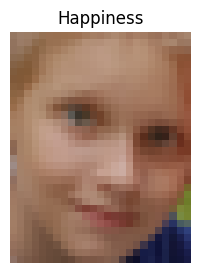

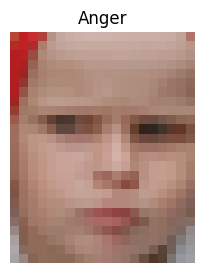

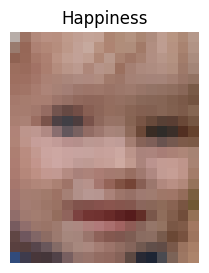

In [8]:
face_img_list=[]
for bbox in bounding_boxes:
    box = bbox.astype(int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    face_img_list.append(face_img)

emotions,scores=fer.predict_multi_emotions(face_img_list,logits=False)
print(emotions,scores)

for face_img,emotion in zip(face_img_list,emotions):    
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(emotion)

In [9]:
features=fer.extract_multi_features(face_img_list)
print(features.shape,features)

(3, 1280) [[ 0.00839785 -0.03408997 -0.0507356  ... -0.077031    0.16629568
   0.07051425]
 [ 0.18906547 -0.0608443  -0.09258673 ... -0.04254748 -0.17534186
   0.24205348]
 [ 0.00077639 -0.03460959 -0.11506259 ...  0.09784297  0.01029368
   0.04113998]]
